# Multiple Linear Regression
This document contains some QM group presentaion parts shown in below:

1. Multiple linear regression - based on the traffic accident data

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [183]:
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")
# csv.info()

C:\Users\29425\AppData\Local\Temp\ipykernel_22304\1176868694.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


## Factors Area

Please define some factor we want to focus on and input them in lists.

(We can define the factor list to focus on some specific factors and clean the invalid data.)

PS: the length of "factor_list" and "invalid_value_list" should be coincident

PSS: use -999 if you do not want to filter anything

In [184]:
# the factor we want to concern
factor_list = ["light_conditions", 
               "weather_conditions", 
               "road_surface_conditions", 
               "junction_control", 
               "junction_detail", 
               "first_road_class", 
               "road_type", 
               "speed_limit",
               "second_road_class"]

# invalid value in each factor - should be coinsident with factor factor_list
invalid_value_list = [[-1], 
                      [-1,8,9], 
                      [-1], 
                      [-1,9], 
                      [-1,99], 
                      [6], 
                      [-1, 9],
                      [-1,99],
                      [6]]

# the factore need to be dropped when making the corelation matrix
dorp_list = ["light_conditions_4", "weather_conditions_4", "road_surface_conditions_4", "junction_control_4", "junction_detail_5"]

# the year we want to focus, need input for a time period
time_range = ["2000", "2020"]

# define the factor list
# csv.columns

## Data Processing Area

please do not change any code if it is not necessary

In [185]:
# make the query string
query_string = ""

for factor_index in range(len(factor_list)):
    for inva_index in range(len(invalid_value_list[factor_index])):
        factor_value = str(factor_list[factor_index])
        inva_value = str(invalid_value_list[factor_index][inva_index])
        query_string = query_string + factor_value +  " != " + inva_value
        if factor_index < len(factor_list):
            query_string = query_string + " & "


# add the year filter

query_string = query_string + "accident_year >= "  + time_range[0] + " & accident_year < " + time_range[1]


# query_string

In [186]:
# get the feild by factors
sub_csv = csv[factor_list]
# sub_csv.info()

In [187]:
# drop the invalid data and choose the year
csv = csv.query(query_string)
# sub_csv = sub_csv.loc[(sub_csv["light_conditions"] != -1) & 
#                       (sub_csv["weather_conditions"] != -1) & 
#                       (sub_csv["weather_conditions"] != 8)& 
#                       (sub_csv["weather_conditions"] != 9)& 
#                       (sub_csv["road_surface_conditions"] != -1), ["light_conditions", "weather_conditions", "road_surface_conditions"]]
csv.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
5118265,2000010SU0983,2000,010SU0983,536010.0,204970.0,-0.032110,51.726908,1,3,2,...,0,1,1,1,0,0,2,1,2,E01023310
5118268,2000010SU0986,2000,010SU0986,523250.0,199890.0,-0.218557,51.684203,1,3,3,...,0,1,1,1,0,0,2,1,1,E01023584
5118275,2000010SU0993,2000,010SU0993,522050.0,200620.0,-0.235651,51.691025,1,3,4,...,0,1,1,1,0,0,2,1,1,E01023584
5118281,2000010SU0999,2000,010SU0999,519030.0,203450.0,-0.278356,51.717107,1,3,2,...,0,4,1,2,0,0,2,1,2,E01023583
5118299,20000141T3221,2000,0141T3221,534380.0,199990.0,-0.057614,51.682550,1,3,3,...,0,4,2,2,4,0,2,1,1,E01001412


In [188]:
# get the feild by factors
sub_csv = csv[factor_list]
sub_csv.head()

,light_conditions,weather_conditions,road_surface_conditions,junction_control,junction_detail,first_road_class,road_type,speed_limit,second_road_class
5118265,1,1,1,4,1,3,12,70.0,3
5118268,1,1,1,4,5,1,3,70.0,1
5118275,1,1,1,4,5,1,3,70.0,1
5118281,4,1,2,4,1,3,1,30.0,3
5118299,4,2,2,4,5,1,3,70.0,1


In [189]:
# calculate the cases number of each type
accident_count = sub_csv.groupby(factor_list).size().reset_index(name='accident_counts')
# accident_count.info()

In [190]:
# reform the df to do dummy
accident_count[factor_list] = accident_count[factor_list].astype(object)



# get dummy
accident_numeric = pd.get_dummies(accident_count)

# accident_numeric.info()

d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [191]:
# drop some value 
accident_final = accident_numeric.drop(dorp_list, axis=1)
# double check the result
accident_final.head()

,accident_counts,light_conditions_1,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_5,weather_conditions_6,...,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,second_road_class_-1,second_road_class_1,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5
0,5,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,11,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,28,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [192]:
# VIF calculating  function: drop_column_using_vif_(df, thresh=5)
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [193]:
# using VIF on accident dataset
df_predictors_selected_VIF = drop_column_using_vif_(accident_final.drop('accident_counts', axis=1))
# print("The columns remaining after VIF selection are:")
# print(df_predictors_selected_VIF.columns)

d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: first_road_class_1


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: road_type_1


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: speed_limit_20.0


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: second_road_class_-1
Dropping: junction_detail_0
Dropping: speed_limit_30.0


In [194]:
# build the model via VIF
model_accident = sm.OLS(endog=accident_final[['accident_counts']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()

## Result Output Area

Here are results

Text(0.5, 1.0, 'Correlation Matrix')

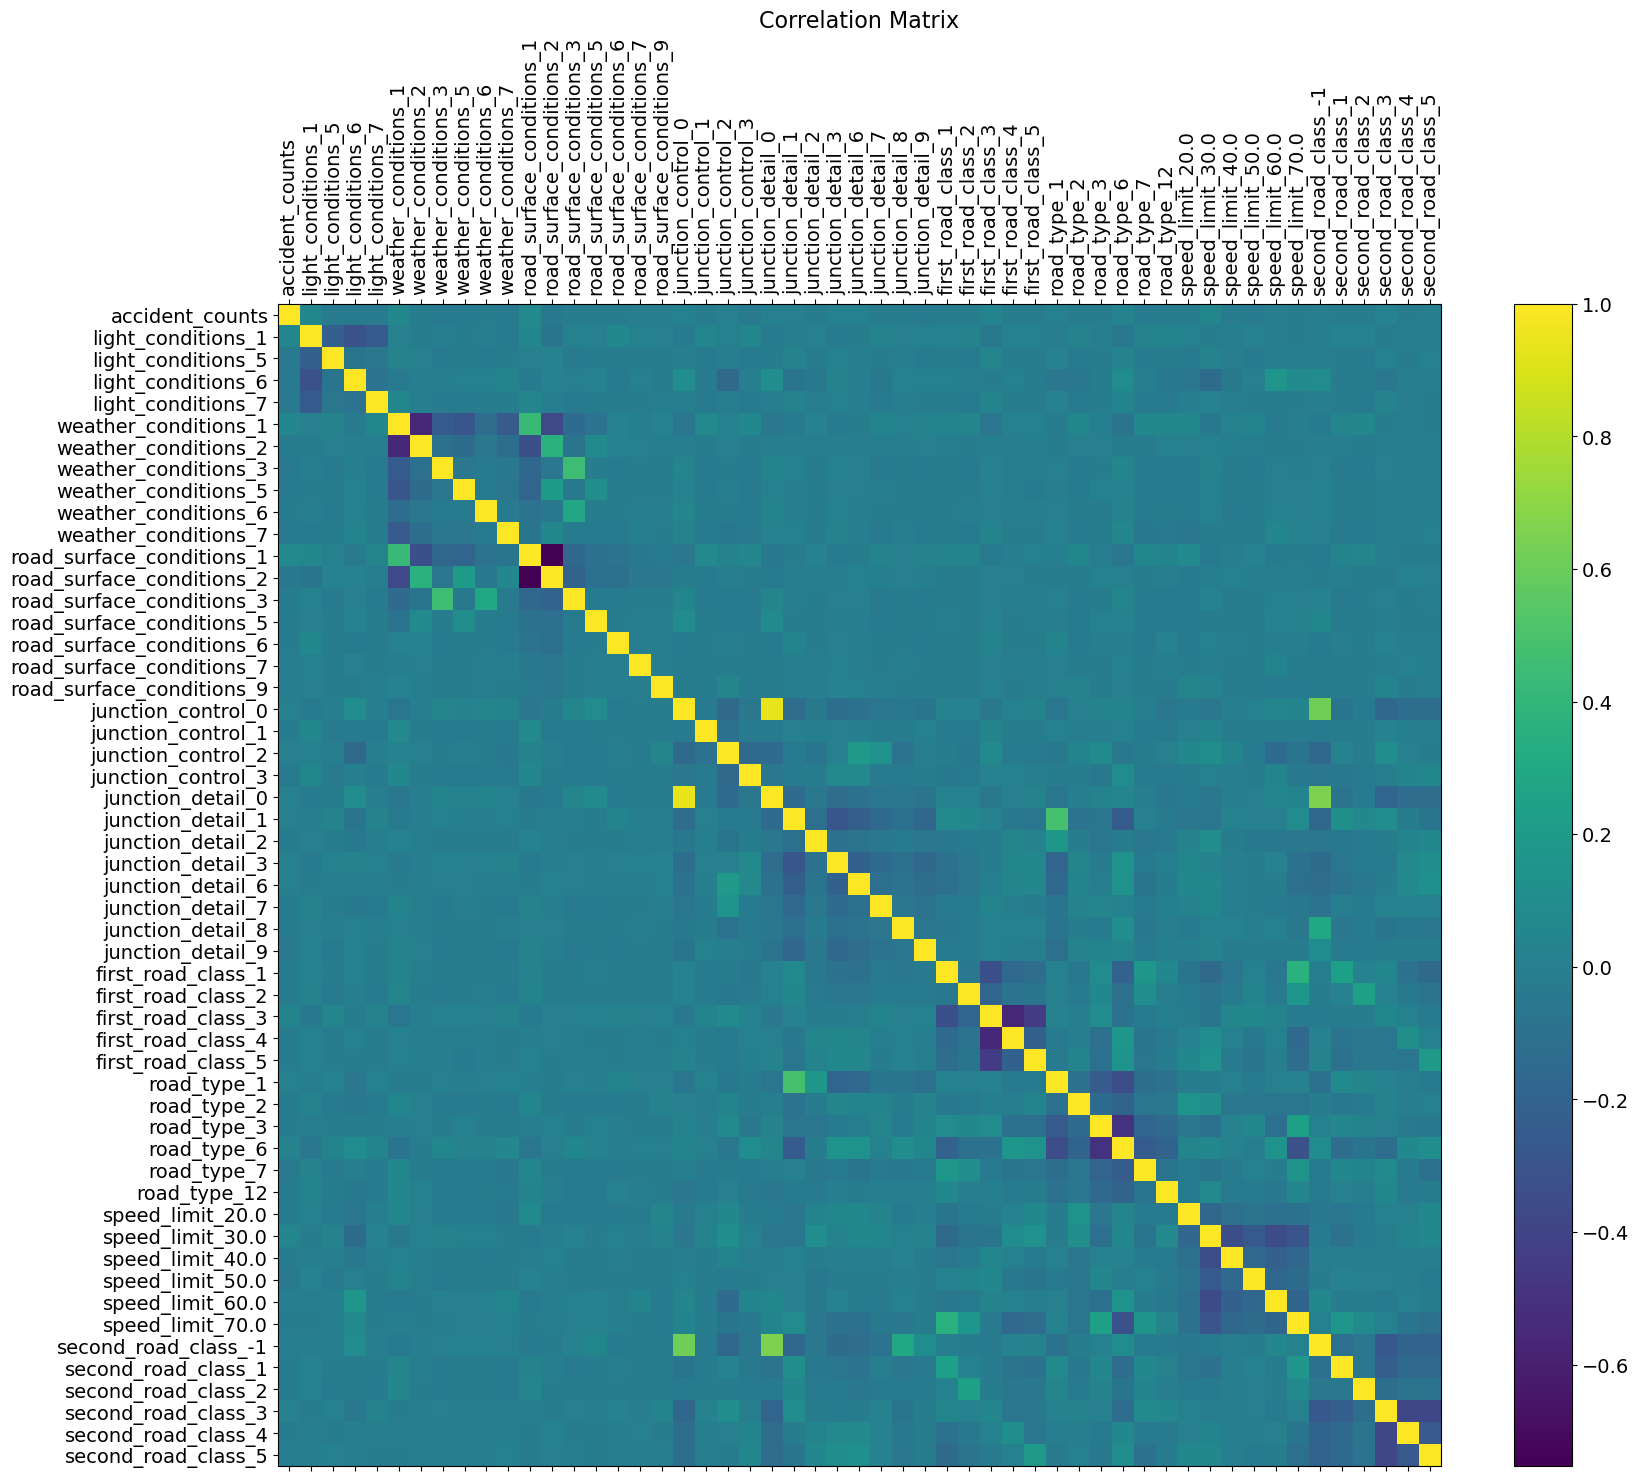

In [195]:
# the corelation matrix

# draw the correalation matrix
df = accident_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [196]:
# the regression model
model_accident.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        accident_counts   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     19.48
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.95e-155
Time:                        05:12:36   Log-Likelihood:            -1.7897e+05
No. Observations:               26423   AIC:                         3.580e+05
Df Residuals:                   26376   BIC:                         3.584e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -51.8968     11.832     -4.386      0.000     -75.089     -28.705
light_conditions_1           21.2797      3.033      7.017      0.000      15.336      27.224
light_conditions_5          -37.3281      6.457     -5.781      0.000     -49.984     -24.672
light_conditions_6          -12.2384      4.956     -2.469      0.014     -21.953      -2.524
light_conditions_7          -37.3340      5.919     -6.308      0.000     -48.935     -25.733
weather_conditions_1         55.9125      5.098     10.969      0.000      45.921      65.904
weather_conditions_2         41.1909      5.755      7.157      0.000      29.911      52.471
weather_conditions_3         21.0149      8.403      2.501      0.012       4.545      37.485
weather_conditions_5         20.1056      7.138      2.817      0.005       6.115      34.097
weather_conditions_6         16.1924     13.243      1.223      0.221      -9.765      42.150
weather_conditions_7         10.1751      7.495      1.358      0.175      -4.516      24.866
road_surface_conditions_1    56.5771      5.618     10.071      0.000      45.566      67.588
road_surface_conditions_2    29.1458      5.542      5.259      0.000      18.284      40.008
road_surface_conditions_3     5.0344      9.000      0.559      0.576     -12.607      22.676
road_surface_conditions_5    -8.5164     12.806     -0.665      0.506     -33.616      16.583
road_surface_conditions_6   -22.3643     13.025     -1.717      0.086     -47.894       3.165
road_surface_conditions_7   -16.6176     24.854     -0.669      0.504     -65.333      32.098
road_surface_conditions_9   -30.0531     25.575     -1.175      0.240     -80.182      20.076
junction_control_0           52.1185      8.770      5.943      0.000      34.928      69.309
junction_control_1          -64.5668      8.500     -7.597      0.000     -81.226     -47.907
junction_control_2          -12.2713      3.225     -3.805      0.000     -18.593      -5.950
junction_control_3          -56.9279      6.103     -9.327      0.000     -68.891     -44.965
junction_detail_1            10.9072      4.920      2.217      0.027       1.263      20.551
junction_detail_2           -29.5840      8.290     -3.568      0.000     -45.834     -13.334
junction_detail_3            21.6580      4.976      4.353      0.000      11.905      31.411
junction_detail_6            20.3185      5.522      3.680      0.000       9.495      31.142
junction_detail_7           -15.6462      6.409     -2.441      0.015     -28.208      -3.085
junction_detail_8            -6.8510      8.250     -0.830      0.406     -23.022       9.320
junction_detail_9           -14.7763      5.958     -2.480      0.013     -26.454      -3.098
first_road_class_2          -15.1725      9.263     -1.638      0.101     -